<a href="https://colab.research.google.com/github/sks95/Machine-Learning-Complete/blob/main/LogisticRegression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.arange(50)
x2 = np.random.rand(x1.size) * 50

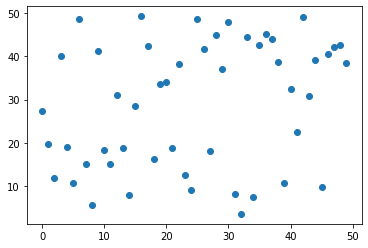

In [3]:
plt.scatter(x1, x2)

In [4]:
x1 > x2

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [5]:
y = np.where(x1 > x2, 0, 1)

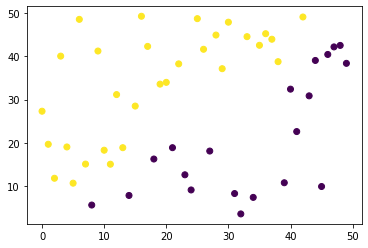

In [6]:
plt.scatter(x1, x2, c = y)

In [7]:
X = np.dstack([x1,x2])[0]

In [8]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(X, y)

LogisticRegression()

In [9]:
logR.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


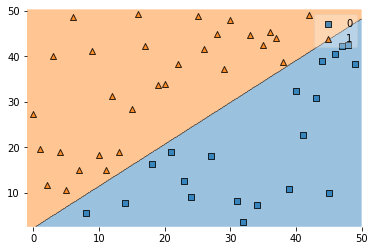

In [11]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf = logR)

In [12]:
logR.coef_

array([[-0.85601327,  0.93062107]])

In [13]:
logR.intercept_

array([-2.08628426])

In [14]:
from IPython.display import clear_output

## Creating Custom Logistic Regression

In [17]:
class CustomLogisticReg():
  def __init__(self, learning_rate, iteration):
    self.learning_rate = learning_rate
    self.iteration = iteration

  def fit(self, X, y):
    row, col = X.shape
    self.W = np.random.rand(col)
    self.b = np.random.rand()

    for i in range(self.iteration):
      dist = X.dot(self.W) + self.b
      y_pred = self.sigmoid(dist)

      dw = (X.T).dot(y_pred - y) / row
      db = (y_pred - y).sum() / row

      self.W = self.W - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

      # ploting
      clear_output(wait = True)
      x1 = np.array([0, 50])
      x2 = -(self.W[0] * x1 + self.b) / self.W[1]

      plt.scatter(X[:, 0], X[:, 1], c = y)
      plt.plot(x1, x2)
      plt.title("Iteration " + str(i))
      plt.show()

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def predict(self, X):
    dist = X.dot(self.W) + self.b
    y_pred = self.sigmoid(dist)

    return np.round(y_pred)

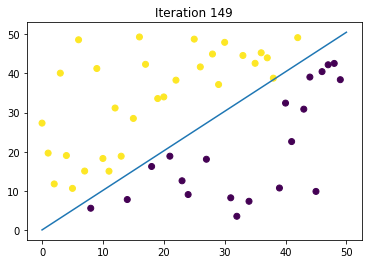

In [18]:
logC = CustomLogisticReg(0.001, 150)
logC.fit(X, y)